# **Data Analysis with Unicorn Data(Visualization)**
Data Source: https://www.kaggle.com/chandanarprasad/unicorn-startups



1.   **Data Import and Exploration**

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/2021512016/Colab_Notebooks/Unicorn_Clean.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         936 non-null    object 
 1   Valuation ($B)  936 non-null    float64
 2   Date Joined     936 non-null    object 
 3   Country         936 non-null    object 
 4   City            936 non-null    object 
 5   Industry        936 non-null    object 
 6   Investor 1      936 non-null    object 
 7   Investor 2      890 non-null    object 
 8   Investor 3      806 non-null    object 
 9   Investor 4      7 non-null      object 
dtypes: float64(1), object(9)
memory usage: 73.2+ KB



*   after eliminating the first unnamed column, there are total 10 columnas and 936 rows.
* column 8, 9, 10 has null values
* column 'Valuation' is the only column in numbers

In [ ]:
# get the statistics for the feature in float
data.describe()

,Valuation ($B)
count,936.000000
mean,3.281154
std,7.473179
min,1.000000
25%,1.050000
50%,1.600000
75%,3.000000
max,140.000000




> Among total 936 unicorn companies in the list, the most highly valued unicorn has USD 140B values, the least highly valued one has USD 1B, with average of USD 3.28B.



2.   **Data Analysis with Visualization**


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['figure.dpi'] = 70
sns.set_theme(style='white')
sns.set_palette(palette='Spectral')

In [ ]:
# Convert the format of 'Data Joined' to Date
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

**2-1. Distribution of unicorn companies by country and industry**

---


In [ ]:
# Distribution by company (Top 10 Countries)
data.Country.value_counts().head(10)

United States     478
China             169
India              51
United Kingdom     37
Germany            23
Israel             21
France             19
Brazil             15
Canada             15
South Korea        11
Name: Country, dtype: int64



* More than half of the 936 unicorn companies are American companies.Followed by China, India, UK, and Germany


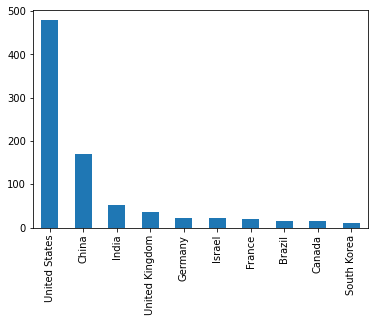

In [ ]:
# show the distribution with column chart
data.Country.value_counts().head(10).plot(kind='bar')

In [ ]:
#distrubution by Industry
data.Industry.value_counts()

Fintech                              191
Internet software & services         167
E-commerce & direct-to-consumer      102
Artificial intelligence               73
Health                                63
Supply chain logistics & delivery     51
Other                                 51
Cybersecurity                         41
Mobile & telecommunications           37
Data management & analytics           36
Hardware                              32
Auto & transportation                 29
Edtech                                27
Consumer & retail                     23
Travel                                13
Name: Industry, dtype: int64

* By Industry, Fintech, Internet software & services, E-commerce & direct-to-consumer are at the top



In [ ]:
# Filtering only Korean companies from the list
condition = (data['Country']=='South Korea')
df_KOR= data[condition]
df_KOR.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
69,Toss,7.40,2018-12-09,South Korea,Seoul,Fintech,Bessemer Venture Partners,Qualcomm Ventures,Kleiner Perkins Caufield & Byers,NaN
154,Yello Mobile,4.00,2014-11-11,South Korea,Seoul,Mobile & telecommunications,Formation 8,NaN,NaN,NaN
312,WEMAKEPRICE,2.34,2015-09-09,South Korea,Seoul,E-commerce & direct-to-consumer,IMM Investment,NXC,NaN,NaN
327,MUSINSA,2.20,2019-11-11,South Korea,Seoul,E-commerce & direct-to-consumer,Sequoia Capital,NaN,NaN,NaN
331,Kurly,2.20,2021-07-09,South Korea,Seoul,Supply chain logistics & delivery,Sequoia Capital China,DST Global,DST Global,NaN


**2-2. Most Valuable Company/Industry**

---



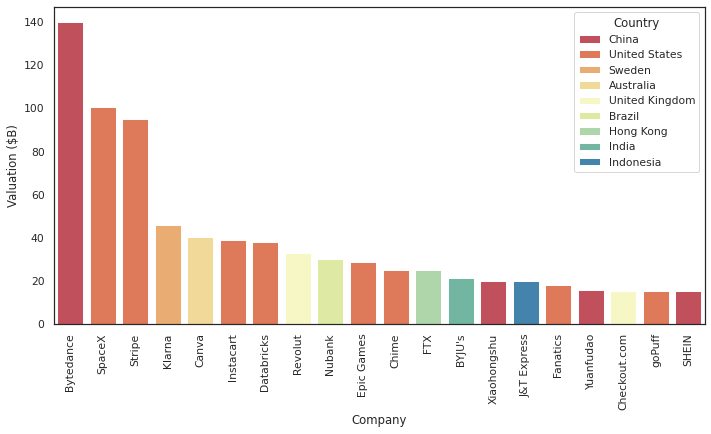

In [ ]:
# Top 20 companies by its value
value_top20 = data.sort_values(by='Valuation ($B)', ascending=False).head(20)

# setting colors by country
c20 = sns.barplot(data=value_top20, x = 'Company', y = 'Valuation ($B)', hue = 'Country', dodge= False, palette = 'Spectral')
c20.set_xticklabels(g.get_xticklabels(), rotation=90);

* Although American companies are appearing the most in the top20 valued company, the most highly valued company was Bytedance from China.


In [ ]:
# Company Values by Industry
industry_value = data.groupby(by='Industry').sum().sort_values(by='Valuation ($B)', ascending=False) #grouping by indstry
industry_value

,Valuation ($B)
Industry,
Fintech,744.13
Internet software & services,483.76
Artificial intelligence,312.84
E-commerce & direct-to-consumer,291.10
Other,245.46
Health,166.26
Supply chain logistics & delivery,146.29
Data management & analytics,121.70
Cybersecurity,107.54


> The total value of the companies by the industry is showing the similar pattern as the number of companies in the list: Fintech, Internet software & services are the top 2

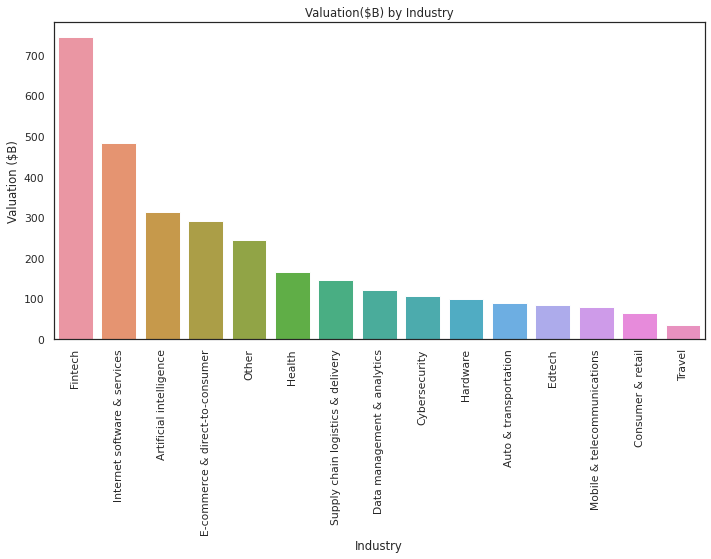

In [ ]:
g = sns.barplot(data=industry_value, x = industry_value.index, y = 'Valuation ($B)')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Valuation($B) by Industry');

In [ ]:
# industry portion
industry_value_per = industry_value['Valuation ($B)'].apply(lambda x: (x/ industry_value.sum()) * 100).round(2)
industry_value_per

,Valuation ($B)
Industry,
Fintech,24.23
Internet software & services,15.75
Artificial intelligence,10.19
E-commerce & direct-to-consumer,9.48
Other,7.99
Health,5.41
Supply chain logistics & delivery,4.76
Data management & analytics,3.96
Cybersecurity,3.50


* Fintech industry is taking 25% of total.
* The Top3 industries are taking about 50% of total company values in the list.
* On the other hand, Travel industry is taking only 1.16%


**2-3. 편입 시기별 분석**

---

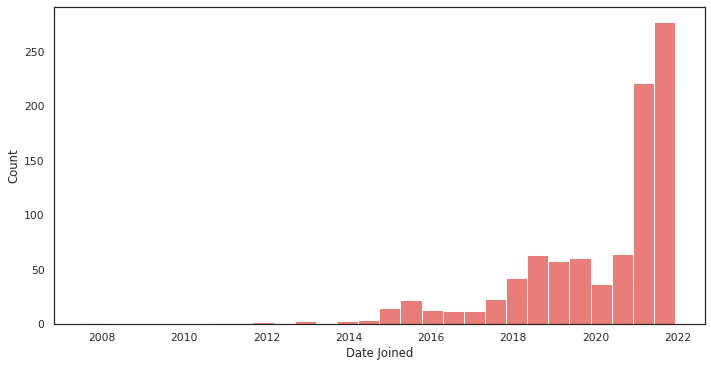

In [ ]:
# Distribution by date joined
sns.histplot(data=data, x = 'Date Joined');

* It is noticeable that companies joining the unicorn list since 2020 has been showing explosive increase.

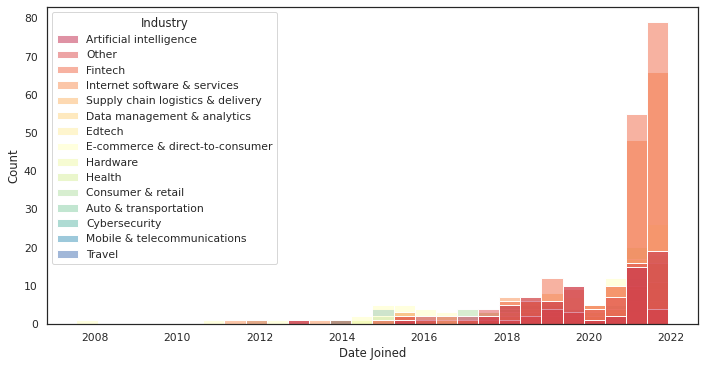

In [ ]:
# Industry distribution by date joined
sns.histplot(data=data, x = 'Date Joined', hue = 'Industry', palette = 'Spectral');

* Companies in Fintech, Internet industry were the main driver for that explosive growth



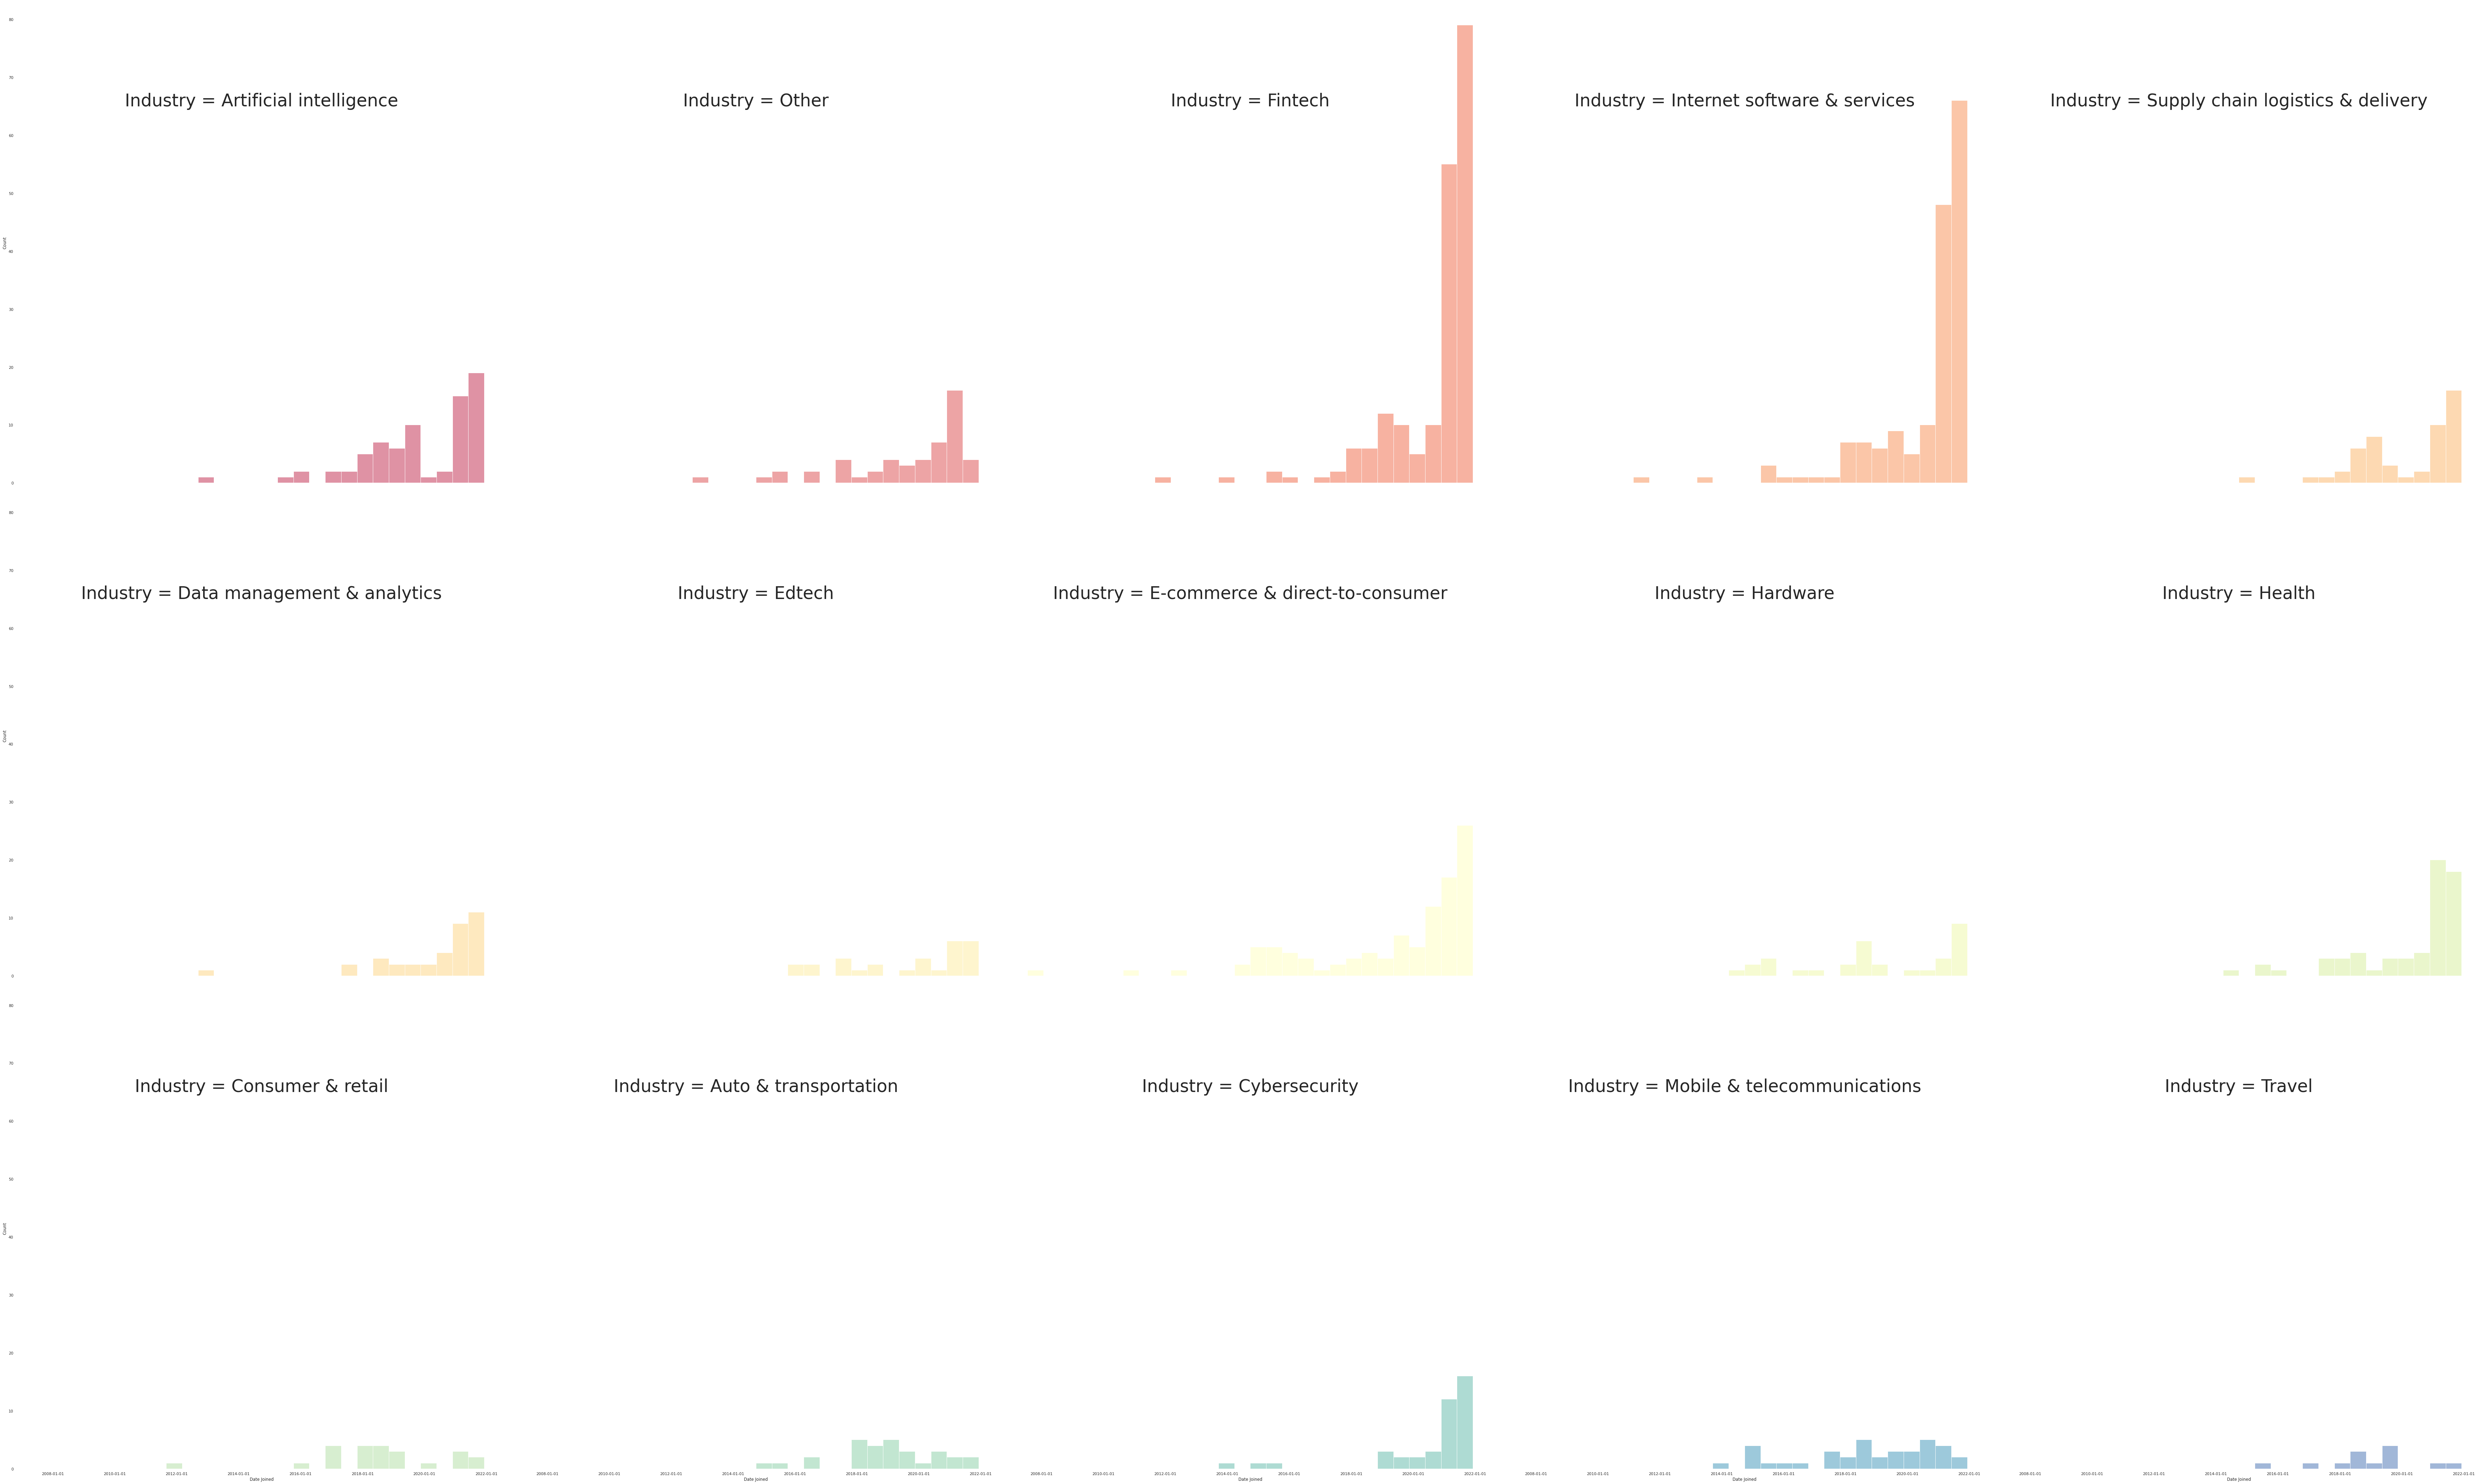

In [ ]:
# showing by industry
g = sns.displot(data=data, x = 'Date Joined', hue = 'Industry', palette = 'Spectral', legend=False, height=20, col='Industry', col_wrap=5)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=True)
g.set_titles(size=50, pad=-300);

In [ ]:
# the duration since the date-joined
data['Age'] = (datetime.now() - data['Date Joined']).apply(lambda x: x.days)
data['Daily Value ($M)'] = (data['Valuation ($B)'] / data['Age']) * 1000
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4,Age,Daily Value ($M)
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,1719,81.442699
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN,3307,30.329604
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN,2889,32.883351
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN,3662,12.452212
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN,1443,27.720028


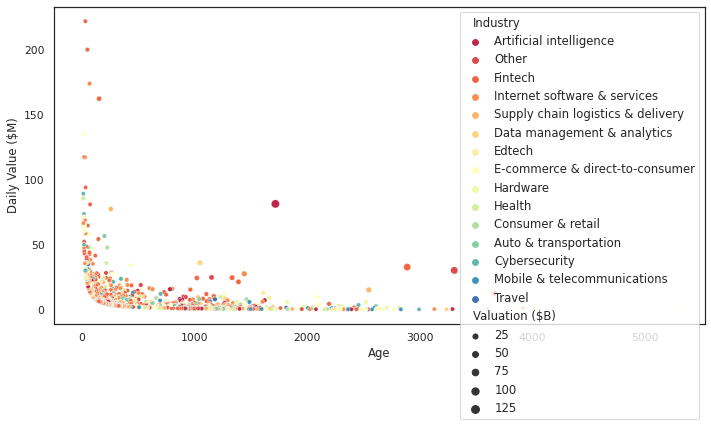

In [ ]:
#scatterplot
sns.scatterplot(data=data, x = 'Age', y = 'Daily Value ($M)', hue='Industry', size='Valuation ($B)', palette = 'Spectral')

> 대부분 유니콘이 된 기간이 길어질 수록 daily Value는 낮아지는 추세를 보임. 그  추세를 따르지 않는 outlier들이 눈에 띄는데, 해당 기업들은 기업가치 자체도 독보적으로 큼